# TP n° 3

# Deux méthodes de résolution numérique d'un problème de Cauchy
$\newcommand{\ds}{\displaystyle}$
$\newcommand{\R}{{\mathbb R}}$

Nous allons programmer deux méthodes pour construire une solution approchée du problème de Cauchy 
\begin{equation}
\left\lbrace
\begin{aligned}
&y'= f(t, y),\\
&y(0) = y_0.
\end{aligned}
\right.
\tag{1}\label{1}
\end{equation}

On va calculer des valeurs approchées de la solutions aux instants $t^n =n\Delta t$, où $\Delta t>0$ est un __pas de temps__ choisi arbitrairement. Pour cela on part de la formule, valable pour toute fonction $y$ de classe $C^1$,

\begin{equation}
y(t^{n+1})-y(t^n)=\int_{t^n}^{t^{n+1}} y'(s) ds
\tag{2}\label{2}
\end{equation}

Ainsi, la fonction $y$, supposée $C^1$, est la solution du problème de Cauchy $\eqref{1}$ si et seulement si, pour toute suite $(t^n)$, 

\begin{equation}
\left\{
\begin{array}{l}
y(t^{n+1})= y(t^n) +\ds\int_{t^n}^{t^{n+1}} f(s,y(s)) ds,\\
y(t^0) = y_0.
\end{array}
\right .
\tag{3}\label{3}
\end{equation}


## 1. Méthode d'Euler


La méthode d'Euler est basée sur la formule $\eqref{3}$ et consiste à remplacer l'intégrale 
par l'approximation:

\begin{equation}
\int_{t^n}^{t^{n+1}} f(s,y(s)) ds\sim (t^{n+1}-t^n)f(t_n,y(t^n))=\Delta t f(t_n,y(t^n)).
\tag{4}\label{4}
\end{equation}



#### QUESTION 1 

A quoi correspond graphiquement cette approximation de $\ds\int_a^b g(s) ds$?

#### Reponse :
Elle correspond à l'aire sous la courbe

#### QUESTION 2

Programmer la méthode d'Euler afin de calculer la solution approchée d'un problème de Cauchy scalaire ( i.e. où l'inconnue est à valeurs dans $\R$) générique. On écrira une fonction euler(f, y_0, T, Delta_t) qui renvoie deux tableaux : t, constitué des instants 0, Delta_t, 2Delta_t,..., T et y, constitué des valeurs de la solution approchée en ces instants.

Tester votre méthode sur l'équation de Malthus, en représentant la solution et plusieurs solutions approchées (pour différents pas de temps) sur le même graphique.

In [2]:
#%matplotlib notebook   # pour jupyter notebook
# %matplotlib widgets  # pour jupyter lab
import numpy as np
import matplotlib.pyplot as plt


def euler(f, y_0, T, Delta_t):
    """
    schéma d'Euler explicite pour résoudre y'=f(t,y) sur [0,T] avec y(0)=y_0
    entrées: f, y_0, T et le pas Delta_t
    sorties: t, y_app
    """
    N = int(T/Delta_t)
    t = np.linspace(0,T,N)
    y = np.zeros(N); 
    y[0]=y_0
    for s in range(N-1):
        y[s+1]= y[s] + Delta_t*f(t[s], y[s]) 
    return t,y

T = 10
Delta_t = 0.2
y_0 = 1
r = 2

def f(t,x):
     return r*x

fig, ax = plt.subplots(1,1,figsize=(6,6))
t, y = euler(f,y_0,T,Delta_t)

ax.plot(t,y,'m', label='y0=1')
plt.title('Modèle de Malthus')
plt.xlabel('tps')
plt.ylabel('Population')
plt.legend()

### Erreur du schéma


Le schéma d'Euler permet de trouver des valeurs approchées $y^n$ aux instants $t^n$ de la valeur $y(t^n)$ de la solution du problème de Cauchy (1). L'erreur du schéma à l'instant $t^n$ est la quantité

\begin{equation}
e_n = \vert y^n -y(t^n)\vert,
\end{equation}

et l'erreur globale du schéma d'Euler est le maximum sur tous les instants de l'erreur locale :

\begin{equation}
e=\max_n e_n.
\end{equation}

Ce que l'on espère, c'est que cette erreur $e$ tende vers 0 quand le pas $\Delta t$ tend vers 0. On dit que le schéma est _convergent_ lorsque c'est le cas.

#### QUESTION 3

Pour l'équation de Malthus ci-dessus, calculer les erreurs globales du schéma d'Euler pour différentes valeurs de $\Delta t$. Ce schéma vous semble-t-il convergent ?

In [3]:
N_0 = 1
def N(t):
    return N_0*np.exp(r*t)

In [4]:
def erreur(dt,f):
    emax = np.zeros(len(dt))
    
    for n in range(len(dt)):
        t, y = euler(f,y_0,T,dt[n])
        exa = N(t)
        for i in range(len(y)):
            val = abs(exa[i]  - y[i])
            if(val > emax[n]):
                emax[n] = val
    return emax

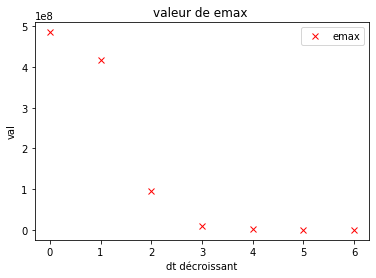

In [5]:
#vu qu'on a besoin d'un pas qui tende vers 0, on a besoin d'un dt décroissant
dt = [1,0.1,0.01,0.001,0.0001,0.00001,0.000001]
emax = erreur(dt,f)

fig, ax = plt.subplots()
x = [0,1,2,3,4,5,6]

ax.plot(x,emax, 'x', color ='red', label= 'emax')
plt.title('valeur de emax ')
plt.xlabel('dt décroissant')
plt.ylabel('val')
plt.legend()

#### Reponse
comme cette erreur tend vers 0 quand dt tend vers 0 alors le schèma converge

#### QUESTION 4
Pour un schéma convergent, on souhaite que la convergence vers la solution exacte soit le plus rapide possible. On dit qu'un schéma est d'ordre $p$ lorsque $e=O((\Delta t)^p)$ quand $\Delta t\to 0$ (pour les fonctions $f$ régulières).

Estimer l'ordre de convergence apparent du schéma d'Euler pour l'équation de Malthus (on pourra tracer
$\log e/\log \Delta t$).

C:\Users\azizb\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


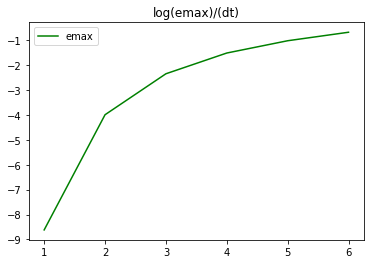

In [6]:
fig, ax = plt.subplots()
ax.plot(x, np.log(emax)/ np.log(dt),'g', label= 'emax')
plt.title('log(emax)/(dt)')
plt.xlabel('')
plt.ylabel('')
plt.legend()

#### QUESTION 5
 
Appliquer ce schéma à la résolution numérique du problème de Verhulst ($r=2$, $K=1$ par exemple,  comme dans le TP1).
On prend $y_0=0.1$ et on veut résoudre le problème entre $t=0$ et $t=T_f=20$. Prenez des valeurs de Delta_t entre 1 et 0.2. Que remarquez-vous?

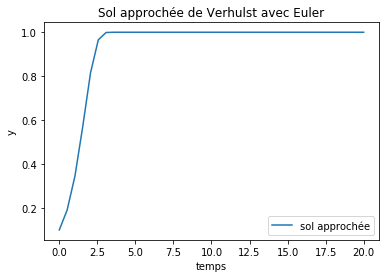

In [7]:
fig, ax = plt.subplots()

y0 = 0.1
K = 1; r = 2
T = 20
Delta_t = 0.5

def VerhulstEDO(t,y):
    return r*y*(1-(y/K))

t, y = euler(VerhulstEDO,y0,T,Delta_t)
ax.plot(t,y, label = "sol approchée")
plt.title('Sol approchée de Verhulst avec Euler')
plt.xlabel('temps')
plt.ylabel('y')
plt.legend()

#### QUESTION 6

On prend maintenant quelques pas de temps inférieurs à 0.1. Tracer des solutions approchées ainsi que la solution exacte dans une fenêtre graphique. 

Vérifier graphiquement que la solution approchée converge bien vers la solution exacte, par exemple en divisant le pas de temps par 2 plusieurs fois. On se focalisera sur l'intervalle [0,2].

In [85]:
P0 = 0.1
def VerhulstSol(t):
    return K*1.0/(1+((K/P0) -1)*np.exp(-r*t))

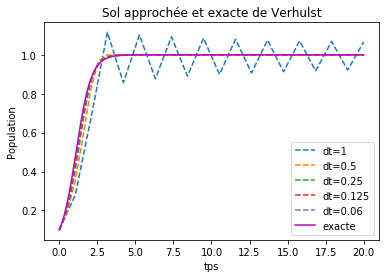

In [86]:
fig, ax = plt.subplots()

TT = [1,0.5,0.25,0.125,0.06]
for dt in TT :
    t, y = euler(VerhulstEDO,y0,T,dt)
    ax.plot(t,y,'--', label = "dt="+str(dt))
    
ax.plot(t,VerhulstSol(t),'m',label="exacte")
plt.title('Sol approchée et exacte de Verhulst')
plt.xlabel('tps')
plt.ylabel('Population')
plt.legend()

#### QUESTION 7

Calculer l'erreur globale apparente du schéma d'Euler pour l'équation de Verhulst. Estimer l'ordre de convergence apparent du schéma d'Euler pour l'équation de Verhulst.

In [87]:
#vu qu'on a besoin d'un pas qui tende vers 0, on a besoin d'un dt décroissant
dt = [1,0.1,0.01,0.001,0.0001,0.00001,0.000001]
emax = erreur(dt,VerhulstEDO)

fig, ax = plt.subplots()
x = [0,1,2,3,4,5,6]

ax.plot(x,emax, 'x', color ='red', label= 'emax')
plt.title('valeur de emax ')
plt.xlabel('dt décroissant')
plt.ylabel('val')
plt.legend()

KeyboardInterrupt: 

In [ ]:
fig, ax = plt.subplots()
ax.plot(x, np.log(emax)/ np.log(dt),'g', label= 'emax')
plt.title('log(emax)/(dt)')
plt.xlabel('')
plt.ylabel('')
plt.legend()

## 2. Schéma du point du milieu :

On veut toujours résoudre le problème de Cauchy (1), en utilisant la formulation intégrale (3). Cette fois on utilise l'approximation

\begin{equation}
\int_a^b g(s)ds
\sim
(b-a)g(\frac{a+b}{2})
\tag{6}\label{6}
\end{equation}

Comme on ne connait évidemment pas la valeur de $y$ à l'instant $\ds t^{n+1/2} := \frac{t^n+t^{n+1}}{2}$, on est conduit au schéma dit _du point milieu_ suivant:

\begin{equation}
\left\{
\begin{array}{lcl}
    t^{n+1/2} &=& t^n + \frac{\Delta t}{2},\\
    y^{n+1/2} &=& y^n + \frac{\Delta t}{2} f(t^n,y^n),\\
    y^{n+1} &=& y^n + \Delta t \ f(t^{n+1/2},y^{n+1/2})
\end{array}
\right .
\tag{7}\label{7}
\end{equation}

#### QUESTION 8

A quoi correspond graphiquement cette approximation de $\ds\int_a^b g(s) ds$?

#### QUESTION 9

Programmer la méthode du point milieu afin de calculer la solution approchée d'un problème de Cauchy scalaire ( i.e. où l'inconnue est à valeurs dans  ℝ ) générique. On écrira une fonction milieu(f, y_0, T, Delta_t) qui renvoie un tableau constitué des valeurs de la solution approchée aux instants 0, Delta_t, 2Delta_t,..., T.

Tester votre méthode sur l'équation de Malthus, en représentant la solution et plusieurs solutions approchées (pour différents pas de temps) sur le même graphique.

In [88]:
# votre réponse

def milieu(f, y_0, T, Delta_t):
    """
    schéma du point milieu pour résoudre y'=f(t,y) sur [0,T] avec y(0)=y_0
    entrées: f, y_0, T et le pas Delta_t
    sorties: t, y_app
    """
    N = int(T/Delta_t)
    t = np.linspace(0,T,N)
    y = np.zeros(len(t))
    y[0]= y_0
    for s in range (N-1):
        tm = t[s] + Delta_t/2.0
        ym = y[s] + (Delta_t/2.0)*f(t[s],y[s])
        y[s+1]= y[s] + Delta_t*f(tm,ym)
    return t, y


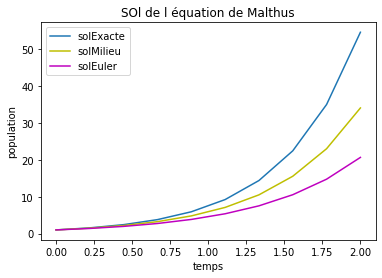

In [89]:
T = 2
Delta_t = 0.2
y_0 = 1
r = 2

def N(t):
    return N_0*np.exp(r*t)
    
fig, ax = plt.subplots()

t, y = euler(f,y_0,T,Delta_t)
tm,ym = milieu(f, y_0, T, Delta_t)
solExacte = N(t)

ax.plot(t,solExacte, label= 'solExacte')
ax.plot(tm,ym,'y', label= 'solMilieu')
ax.plot(t,y, 'm', label= 'solEuler')
plt.title('SOl de l équation de Malthus')
plt.xlabel('temps')
plt.ylabel('population')
plt.legend()


#### QUESTION 10

Pour l'équation de Malthus ci-dessus, calculer les erreurs globales du schéma du point milieu pour différentes valeurs de $\Delta t$. Ce schéma vous semble-t-il convergent ?

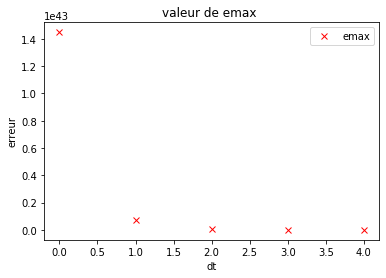

In [90]:
def erreurM(N,dt,f):
    emax = np.zeros(len(dt))
    
    for n in range(len(dt)):
        t, y = milieu(f, y_0, 50, dt[n])
        exa = N(t)
        for i in range(len(y)):
            val = abs(exa[i]  - y[i])
            if(val > emax[n]):
                emax[n] = val
    return emax

dt = [0.1,0.01,0.001,0.0001,0.00001]
emax = erreurM(N,dt,f)
x = [0,1,2,3,4]

fig, ax = plt.subplots()

ax.plot(x,emax, 'rx', label= 'emax')
plt.title('valeur de emax ')
plt.xlabel('dt')
plt.ylabel('erreur')
plt.legend()

#### Reponse
Le schema converge (l'erreur tend vers 0)

#### QUESTION 11

Estimer l'ordre de convergence du schéma du point milieu pour l'équation de Malthus.

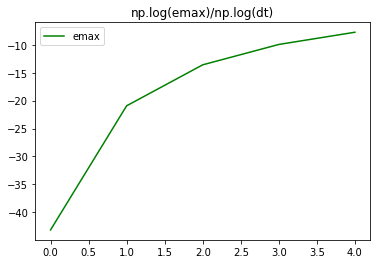

In [91]:
fig, ax = plt.subplots()

ax.plot(x, np.log(emax)/np.log(dt), 'g', label= 'emax')
plt.title('np.log(emax)/np.log(dt)')
plt.xlabel('')
plt.ylabel('')
plt.legend()

#### QUESTION 12

Reprendre les questions 9, 10 et 11 pour l'équation de Verhulst.

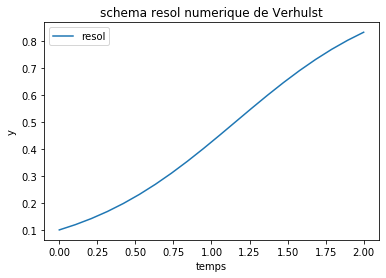

In [92]:
fig, ax = plt.subplots()
y0 = 0.1
K = 1; r = 2
T = 2
Delta_t = 0.1

t, y = milieu(VerhulstEDO,y0,T,Delta_t)
ax.plot(t,y, label = "resol")
plt.title('schema resol numerique de Verhulst')
plt.xlabel('temps')
plt.ylabel('y')
plt.legend()

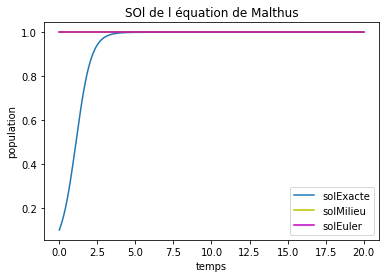

In [94]:
fig, ax = plt.subplots()
T = 20
t, y = euler(VerhulstEDO,y_0,T,Delta_t)
tm,ym = milieu(VerhulstEDO, y_0, T, Delta_t)
solExacte = VerhulstSol(t)

ax.plot(t,solExacte, label= 'solExacte')
ax.plot(t,ym,'y', label= 'solMilieu')
ax.plot(t,y, 'm', label= 'solEuler')
plt.title('SOl de l équation de Malthus')
plt.xlabel('temps')
plt.ylabel('population')
plt.legend()


[0.5 0.5 0.5 0.5 0.5]


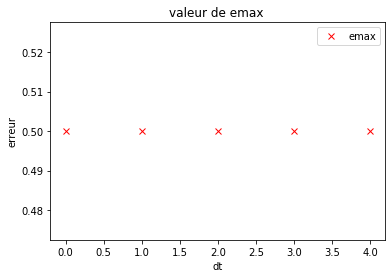

In [78]:
dt = [0.1,0.01,0.001,0.0001,0.00001]
emax = erreurM(N_,dt,VerhulstEDO)
x = [0,1,2,3,4]
fig, ax = plt.subplots()
ax.plot(x,emax, 'rx', label= 'emax')
plt.title('valeur de emax ')
plt.xlabel('dt')
plt.ylabel('erreur')
plt.legend()
print(emax)

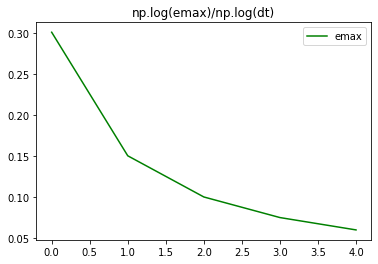

In [74]:
fig, ax = plt.subplots()
ax.plot(x, np.log(emax)/np.log(dt), 'g', label= 'emax')
plt.title('np.log(emax)/np.log(dt)')
plt.xlabel('')
plt.ylabel('')
plt.legend()

#### QUESTION 13

On peut prouver qu'en fait, l'ordre d'un schéma numérique pour résoudre des problèmes de Cauchy (1) ne dépend pas de la fonction $f$ (pourvu qu'elle soit assez régulière). Parmi les deux schémas qu'on a étudié, lequel utiliserez vous à l'avenir?